<a href="https://colab.research.google.com/github/mayankjain281/Project_7_Apollo/blob/main/Project_7_Apollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Problem

As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.
You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.
One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.


Objective:

* To find which variables are significant in predicting the reason for hospitalization for different regions.

* Analysisng how well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

Concept used:

* Uni-Variate Analysis
* Bi-Variate Analysis
* 2-sample t-test
* ANNOVA
* Chi-square

### Basic data exploration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2, f # distributions

from scipy.stats import ttest_ind, ttest_rel, f_oneway, kruskal # numerical vs categorical
from scipy.stats import chisquare, chi2_contingency # categorical features
from scipy.stats import pearsonr, spearmanr # numeric vs numeric

from scipy.stats import kstest # cdf

from statsmodels.distributions.empirical_distribution import ECDF
# Empirical CDF

In [ ]:
df = pd.read_csv('/content/scaler_apollo_hospitals.csv')

In [ ]:
df

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [ ]:
df.shape

(1338, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
df = df.drop(df.columns[0],axis=1)
# remove unnecessary columns

In [ ]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [ ]:
df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [ ]:
df.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [ ]:
df['severity level']= df['severity level'].astype('object')

In [ ]:
cat_cols = list(df.dtypes[df.dtypes =='object'].index)
num_cols = list(df.dtypes[df.dtypes !='object'].index)
cat_cols,num_cols

(['sex', 'smoker', 'region', 'severity level'],
 ['age', 'viral load', 'hospitalization charges'])

In [ ]:
for i in cat_cols:
  print(df[i].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64


### Univariate Data Analysis

In [ ]:
df2=df.copy()
cat_count = df2[cat_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='Counts')
s = df2[cat_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['Counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value','Counts','Percent']).first()

# there are just less than 5% patients with severity level 4 or 5.

Empty DataFrame
Columns: []
Index: [(region, northeast, 324, 24), (region, northwest, 325, 24), (region, southeast, 364, 27), (region, southwest, 325, 24), (severity level, 0, 574, 43), (severity level, 1, 324, 24), (severity level, 2, 240, 18), (severity level, 3, 157, 12), (severity level, 4, 25, 2), (severity level, 5, 18, 1), (sex, female, 662, 49), (sex, male, 676, 51), (smoker, no, 1064, 80), (smoker, yes, 274, 20)]

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364
severity level,1338,6,0,574


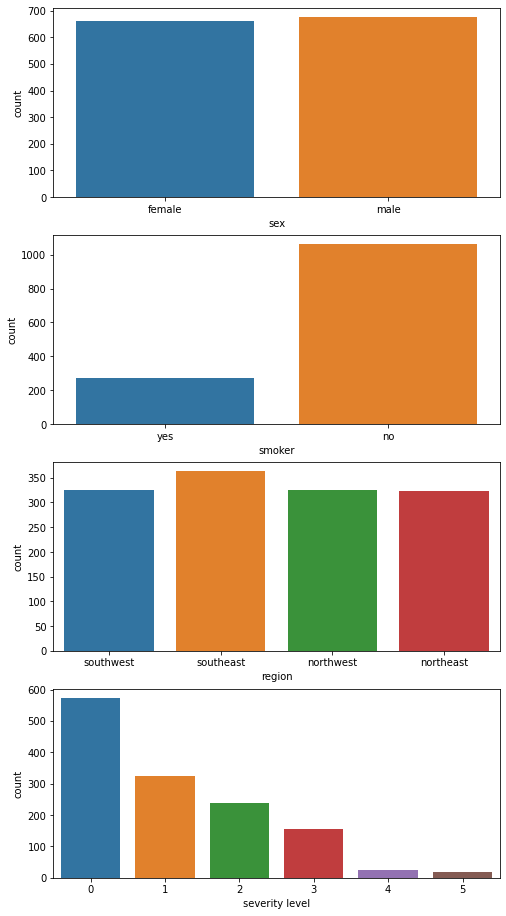

In [ ]:
plt.figure(figsize = [8,16])
for i in range (len(cat_cols)):
  plt.subplot(len(cat_cols),1, i+1)
  sns.countplot(data=df, x=cat_cols[i])

<AxesSubplot:>

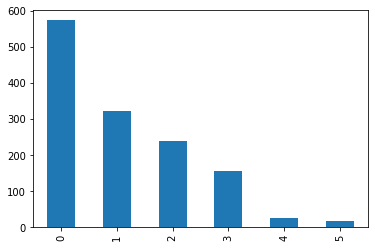

In [ ]:
df['severity level'].value_counts().plot(kind='bar')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


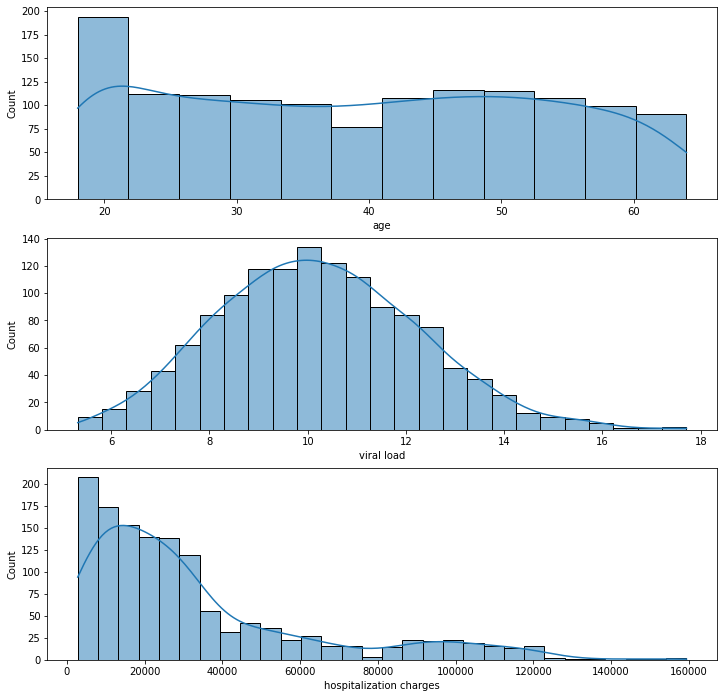

In [ ]:
plt.figure(figsize = [12,12])
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.histplot(data=df, x=num_cols[i], kde=True)

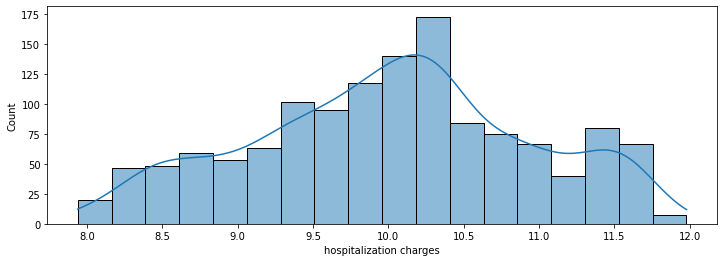

In [ ]:
plt.figure(figsize = [12,4])
sns.histplot(np.log(df['hospitalization charges']),kde=True)
plt.show()

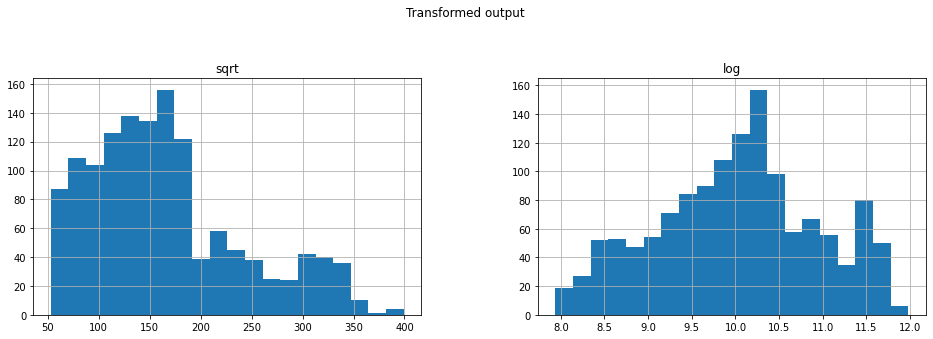

In [ ]:
trans = df['hospitalization charges'].transform([np.sqrt, np.log])
trans.hist(bins=20, layout=(2,2),figsize=(16,10))
plt.suptitle('Transformed output')
plt.show()

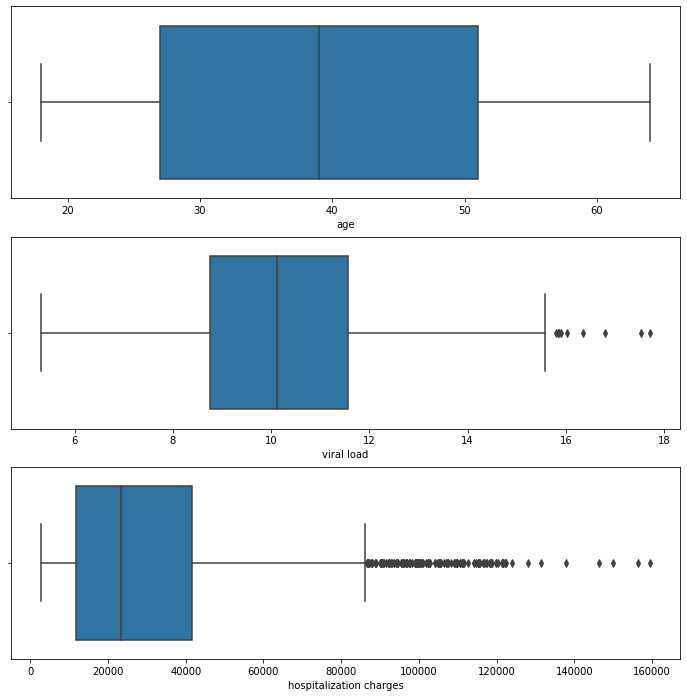

In [ ]:
plt.figure(figsize = [12,12])
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.boxplot(data=df, x=num_cols[i])

In [ ]:
for i in (num_cols):
  print(i, round(df[i].skew(),1))

# windspeed distributioni is right skewed, means it has some outliers in right.

age 0.1
viral load 0.3
hospitalization charges 1.5


<Figure size 1584x360 with 0 Axes>

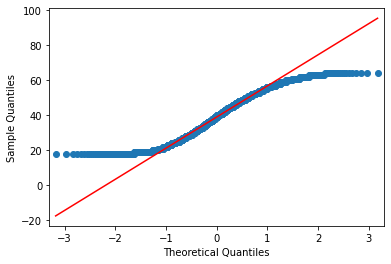

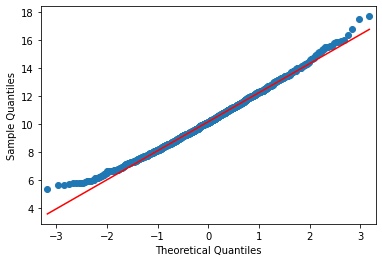

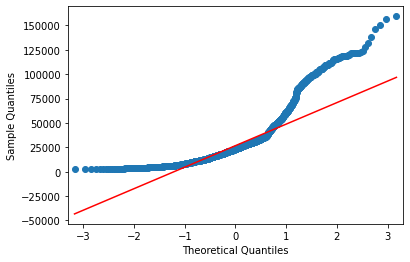

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.figure(figsize = [22,5])
for i in (num_cols):
  sm.qqplot(df[i], line ='q')

# hospitalization charge values clearly do not follow the red line, 
# which is an indication that they do not follow a normal distribution.

In [ ]:
for i in num_cols:
  R_whisker = np.percentile(df[i],75)+(np.percentile(df[i],75)-np.percentile(df[i],25))*1.5
  outliers_percentage = df[df[i]>R_whisker].index.size/df.index.size*100
  print(f'Percentage of outliers in {i} column = ', round(outliers_percentage,2))

Percentage of outliers in age column =  0.0
Percentage of outliers in viral load column =  0.67
Percentage of outliers in hospitalization charges column =  10.39


In [ ]:
for i in num_cols:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  IQR=q3-q1
  outliers_percentage = df[((df[i]<(q1-1.5*IQR)) | (df[i]>(q3+1.5*IQR)))].index.size/df.index.size*100
  print(f'Percentage of outliers in {i} column = ', round(outliers_percentage,2))

Percentage of outliers in age column =  0.0
Percentage of outliers in viral load column =  0.67
Percentage of outliers in hospitalization charges column =  10.39


In [ ]:
q1=df['viral load'].quantile(0.25)
q3=df['viral load'].quantile(0.75)
IQR=q3-q1
df = df[~((df['viral load']<(q1-1.5*IQR)) | (df['viral load']>(q3+1.5*IQR)))]

# viral load column has less than 1% outliers so we will remove them using IQR method.

In [ ]:
p99=df['hospitalization charges'].quantile(0.95)
df = df[~((df['hospitalization charges']<0) | (df['hospitalization charges']>p99))]

# hospitalization charges column has more than 10% outliers so we will just remove extreme 1% of them using percentile method.

### Bivariate Data Analysis

In [ ]:
# df.value_counts(['smoker','sex'],normalize='index')
df.value_counts(['smoker','sex'],normalize='index').reset_index(name='percentage').groupby(['smoker','sex','percentage']).first()

Empty DataFrame
Columns: []
Index: [(no, female, 0.40881913303437967), (no, male, 0.3863976083707025), (yes, female, 0.08594917787742899), (yes, male, 0.11883408071748879)]

In [ ]:
pd.crosstab(df['smoker'],df['sex'], normalize=True)

sex,female,male
smoker,,
no,0.408819,0.386398
yes,0.085949,0.118834


In [ ]:
pd.crosstab(df['sex'],df['smoker'], normalize='columns')
# conditional count/normalize not possible with value_counts.

smoker,no,yes
sex,,
female,0.514098,0.419708
male,0.485902,0.580292


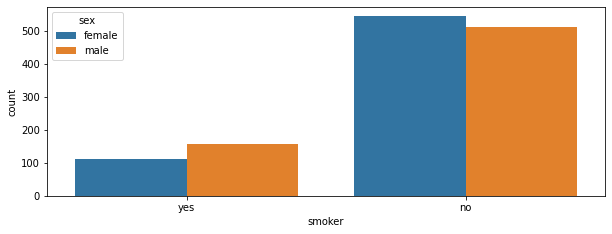

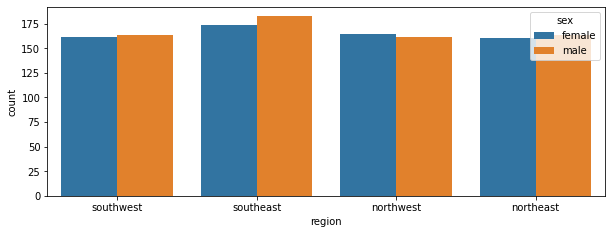

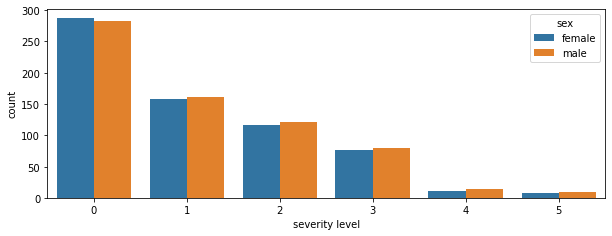

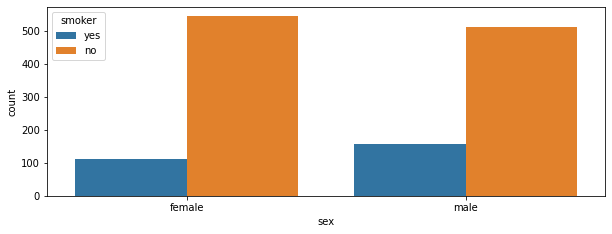

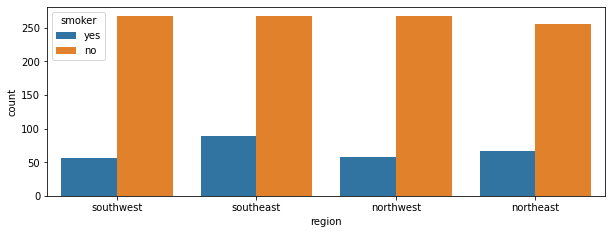

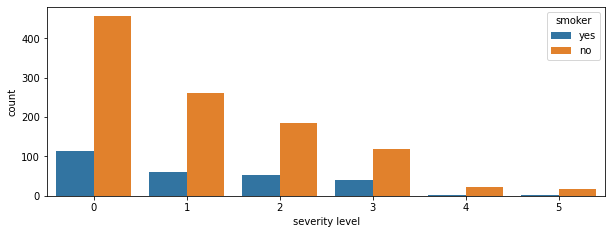

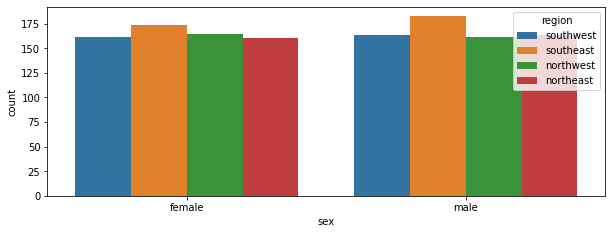

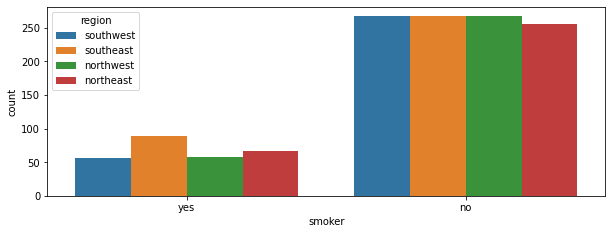

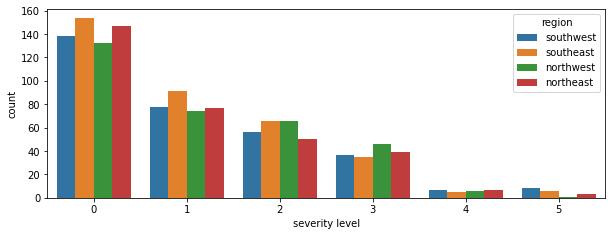

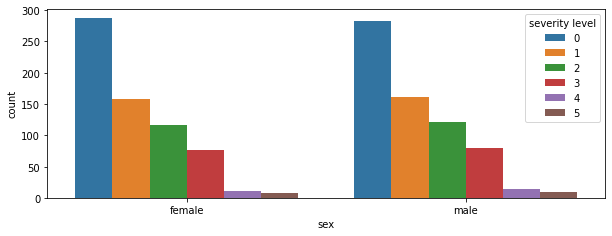

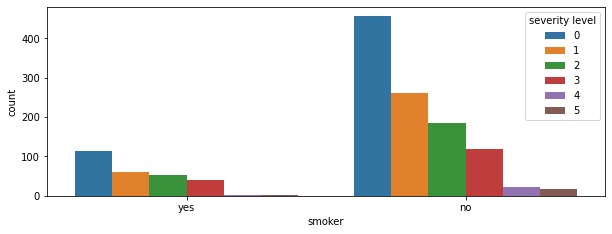

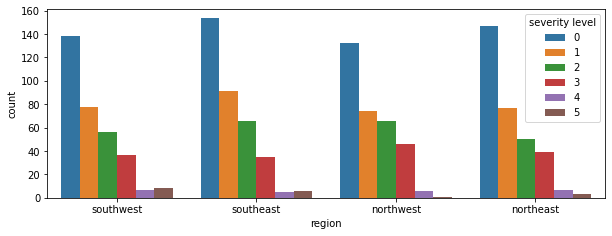

In [ ]:
for j in range (len(cat_cols)):
  for i in range (len(cat_cols)):
    if i!=j:
      plt.figure(figsize = [10,16])
      plt.subplot(len(cat_cols), 1, i+1)
      sns.countplot(data=df, x=cat_cols[i],hue=cat_cols[j])
      plt.show()

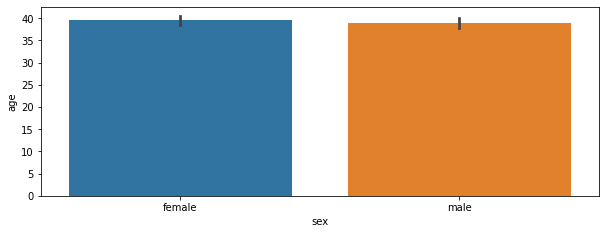

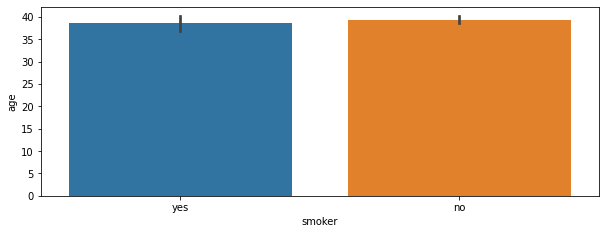

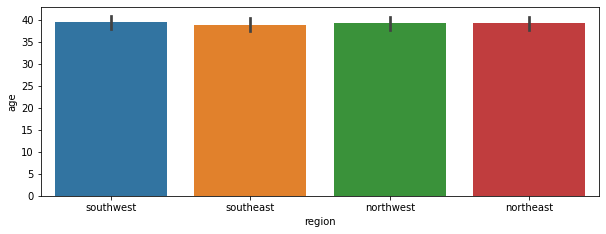

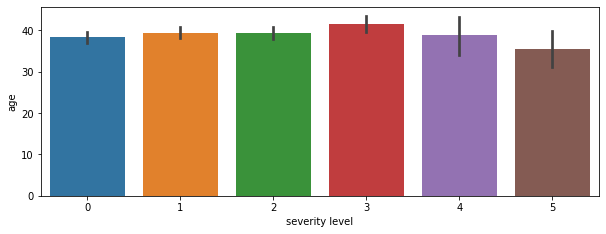

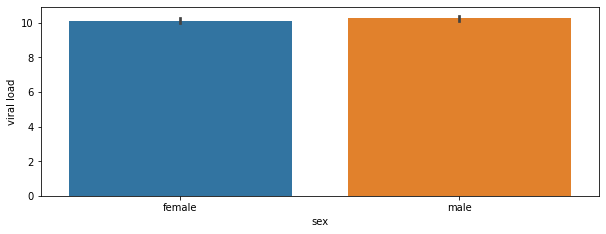

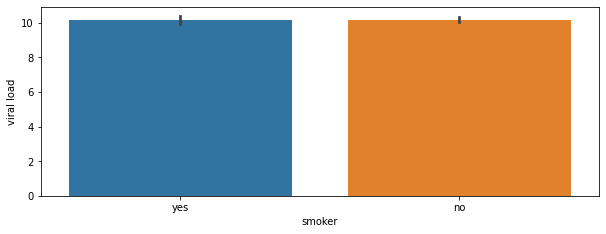

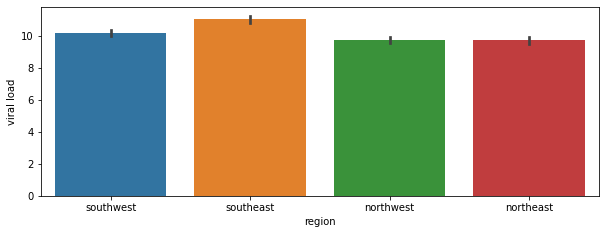

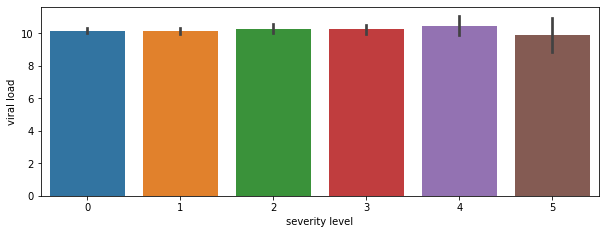

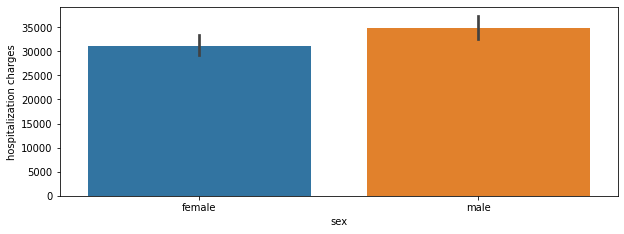

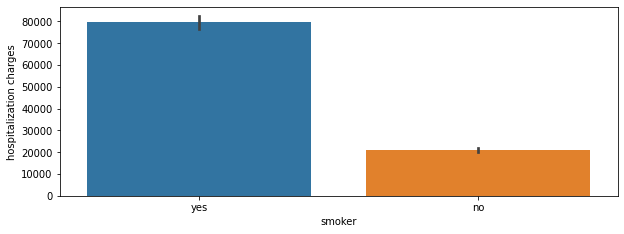

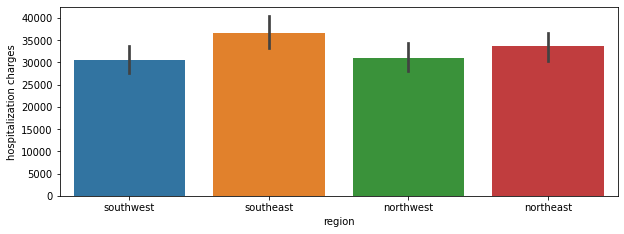

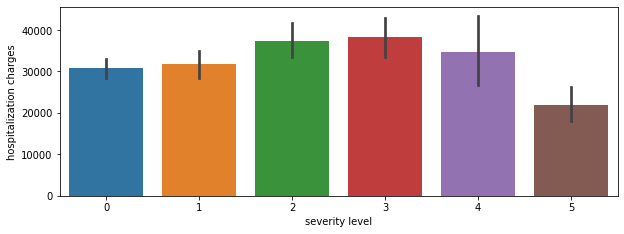

In [ ]:
for j in range(len(num_cols)):
  for i in range (len(cat_cols)):
    plt.figure(figsize = [10,16])
    plt.subplot(len(cat_cols), 1, i+1)
    sns.barplot(data=df, x=cat_cols[i],y=num_cols[j])
    plt.show()

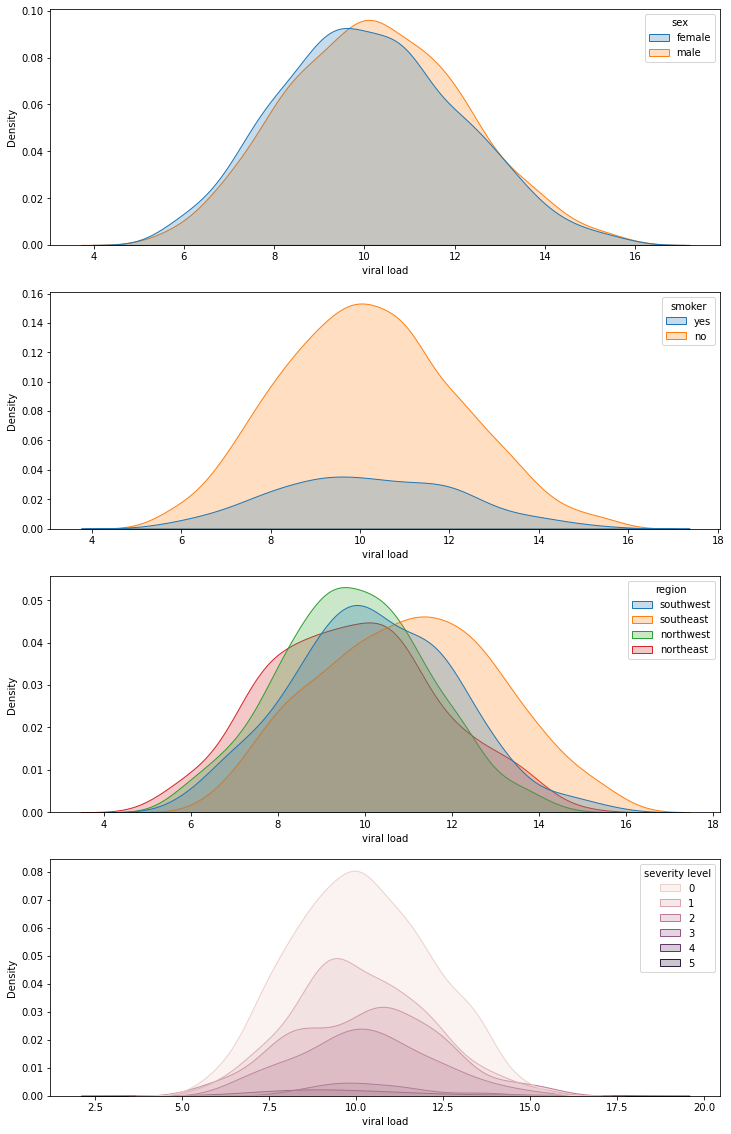

In [ ]:
plt.figure(figsize = [12,20])
for j in range(len(cat_cols)):
  plt.subplot(len(cat_cols), 1,j+1)
  sns.kdeplot(data=df,x='viral load',hue=cat_cols[j],fill=True)

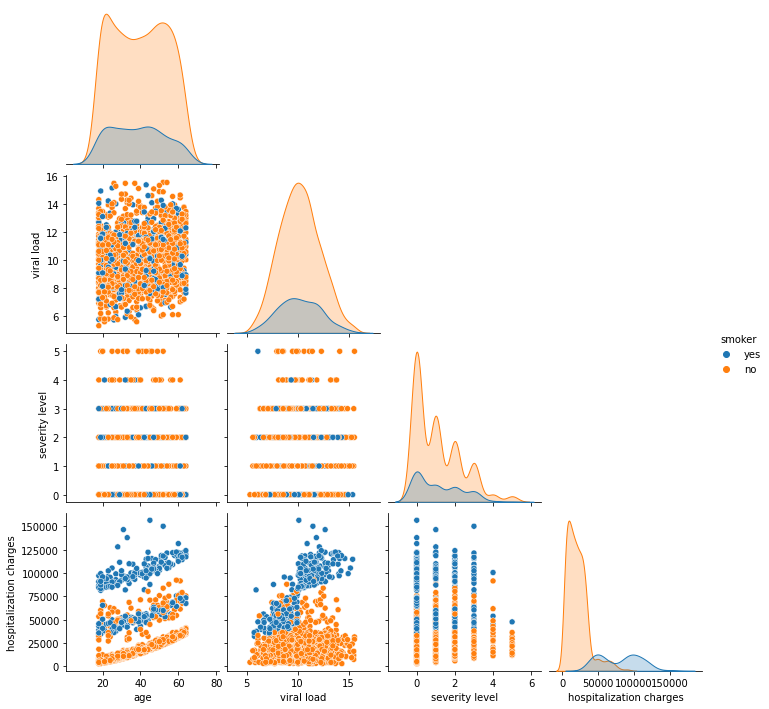

In [ ]:
sns.pairplot(data = df, hue= 'smoker', corner=True)
plt.show()

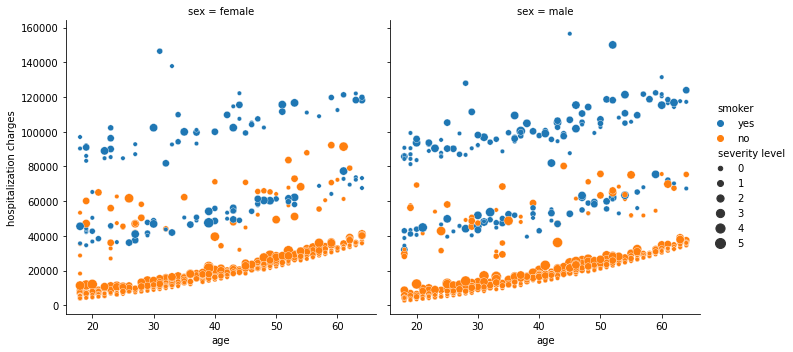

In [ ]:
sns.relplot(data=df, y="hospitalization charges", x="age", hue='smoker', size="severity level", sizes=(20, 100), col="sex")

# There are more male who is smoker.

In [ ]:
df[df['smoker']=='yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,271.0,38.523985,13.932057,18.00,27.000,38.00,49.000,64.0
viral load,271.0,10.167970,2.013258,5.73,8.685,10.12,11.675,15.4
hospitalization charges,271.0,79588.354244,28461.379883,32074.00,51899.500,85758.00,102342.000,156482.0


In [ ]:
df[df['smoker']=='no'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1058.0,39.378072,14.078600,18.00,27.00,40.0,52.000,64.00
viral load,1058.0,10.182108,1.964027,5.32,8.77,10.1,11.455,15.58
hospitalization charges,1058.0,21105.423440,15007.155103,2805.00,9971.25,18353.5,28407.750,92277.00


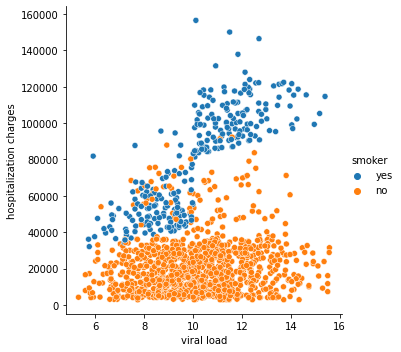

In [ ]:
sns.relplot(data=df, y="hospitalization charges", x="viral load", hue='smoker')
plt.show()

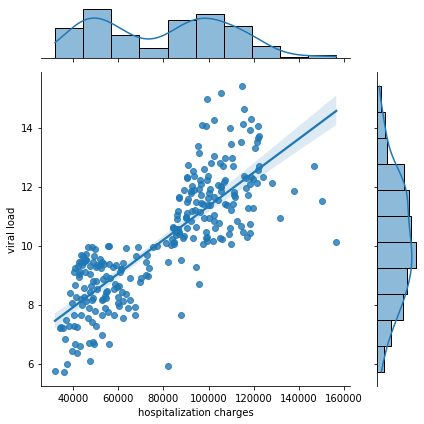

In [ ]:
sns.jointplot(x='hospitalization charges', y='viral load', data=df[df['smoker']=='yes'], kind='reg')
plt.tight_layout()
plt.show()

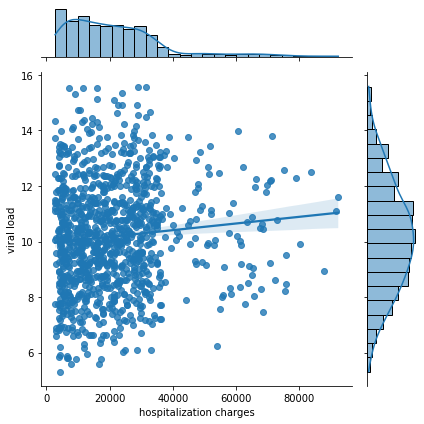

In [ ]:
sns.jointplot(x='hospitalization charges', y='viral load', data=df[df['smoker']=='no'], kind='reg')
plt.tight_layout()
plt.show()

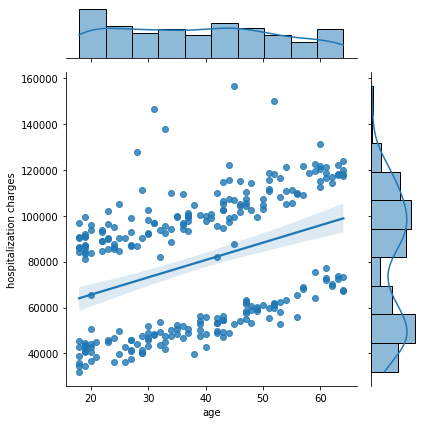

In [ ]:
sns.jointplot(y='hospitalization charges', x='age', data=df[df['smoker']=='yes'], kind='reg')
plt.tight_layout()
plt.show()

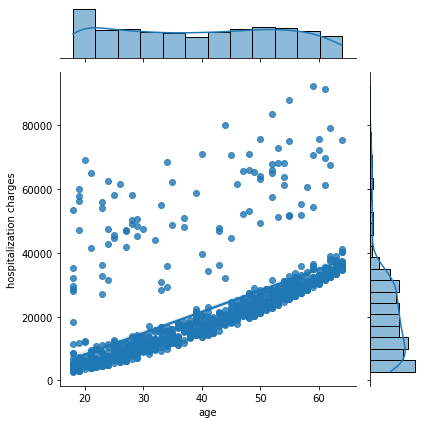

In [ ]:
sns.jointplot(y='hospitalization charges', x='age', data=df[df['smoker']=='no'], kind='reg')
plt.tight_layout()
plt.show()

In [ ]:
corr = df.corr()
corr

,age,viral load,hospitalization charges
age,1.000000,0.109300,0.299008
viral load,0.109300,1.000000,0.198388
hospitalization charges,0.299008,0.198388,1.000000


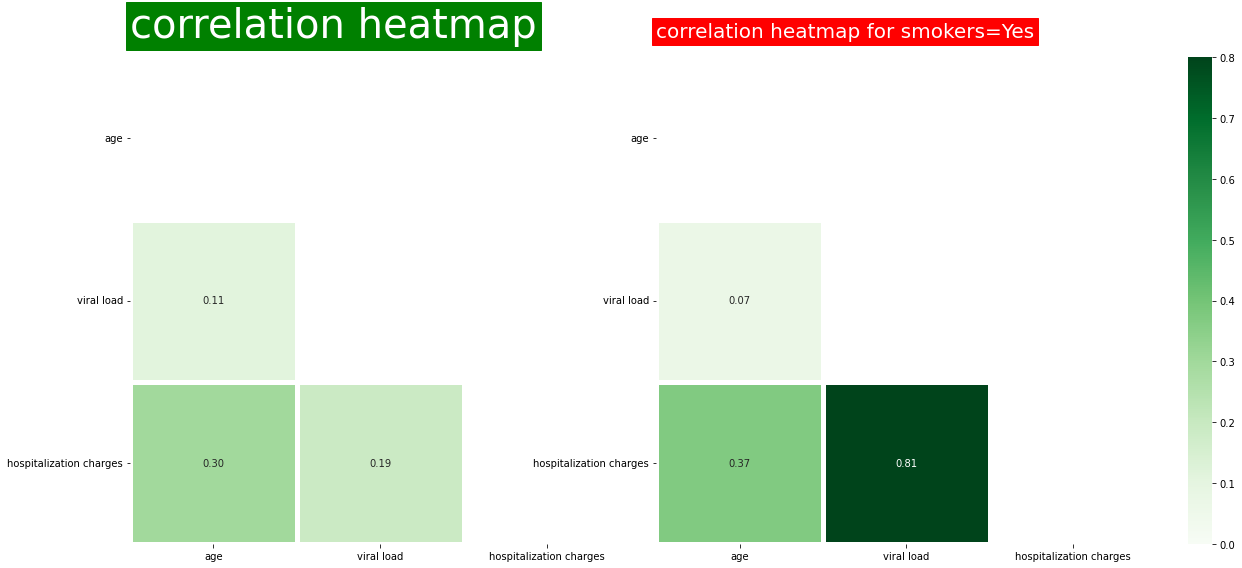

In [ ]:
fig=plt.figure(figsize = [18,8])
df_somoker = df.copy()[df['smoker']=='yes']

plt.subplot(1, 2, 1)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr().round(2), cmap= "Greens", annot=True, mask=mask, fmt=".2f", linewidths=5, vmin=0, vmax=0.8)
plt.tight_layout()
plt.title('correlation heatmap', color='w',fontsize=40, fontweight = 'normal',backgroundcolor = 'g', pad = 20, loc='left')
plt.yticks(rotation = 0)

plt.subplot(1, 2, 2)
mask = np.triu(np.ones_like(df_somoker.corr()))
sns.heatmap(df_somoker.corr().round(2), cmap= "Greens", annot=True, mask=mask, fmt=".2f", linewidths=5, vmin=0, vmax=0.8)
plt.tight_layout()
plt.title('correlation heatmap for smokers=Yes', color='w',fontsize=20, fontweight = 'normal',backgroundcolor = 'r', pad = 20, loc='left')
plt.yticks(rotation = 0)
plt.show()

# In general there is no correlation greater than 0.5 percent between any two variables,
# But if we see correlation for onle smoker patients then,
# we can observe that there is highly correlation between viral load and hospitalization charge
# and also there is correlation between age and hospitalization charge

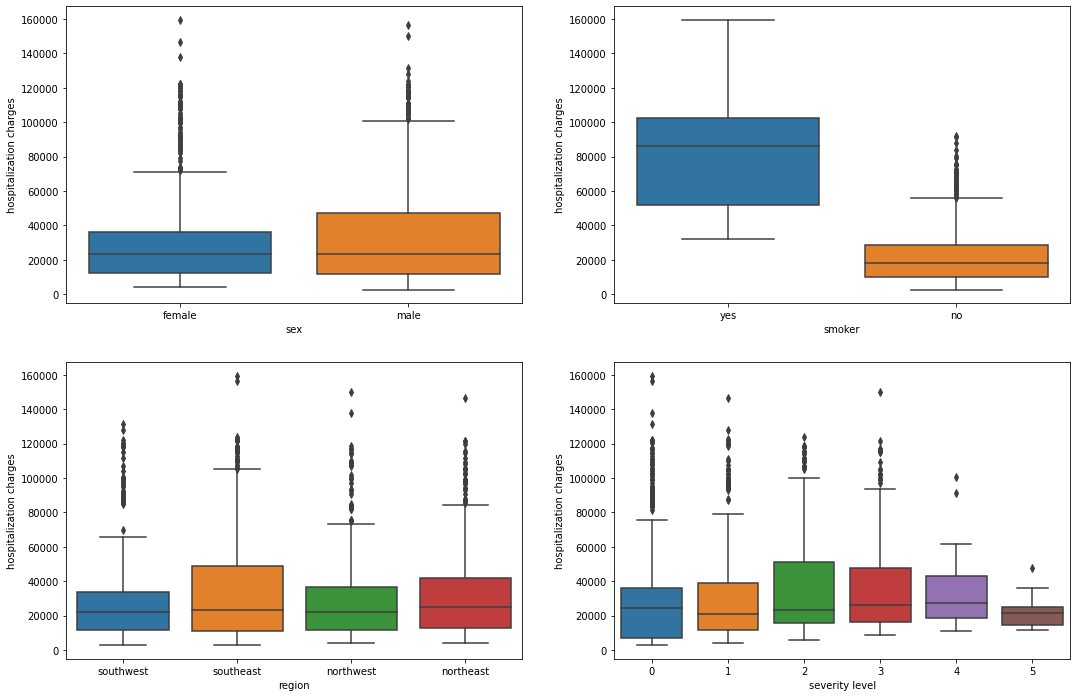

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
index = 0
for i in range(2):
  for j in range(2):
    sns.boxplot(y='hospitalization charges', x=cat_cols[index],data=df, ax=axs[i, j])
    index += 1
plt.show()

Observations
1. smoker patients will have high hospitalization charges.
2. medians for sex seems like both genders have similar hospitalization charges. statistical test
need to get true picture.
3. Patients living in southeast and northeast , have slightly higher hospitalization charges as
compared to southweat and northwest respectively.
4. with increase in severity level from 1 to 5 hospitalization charges also increses

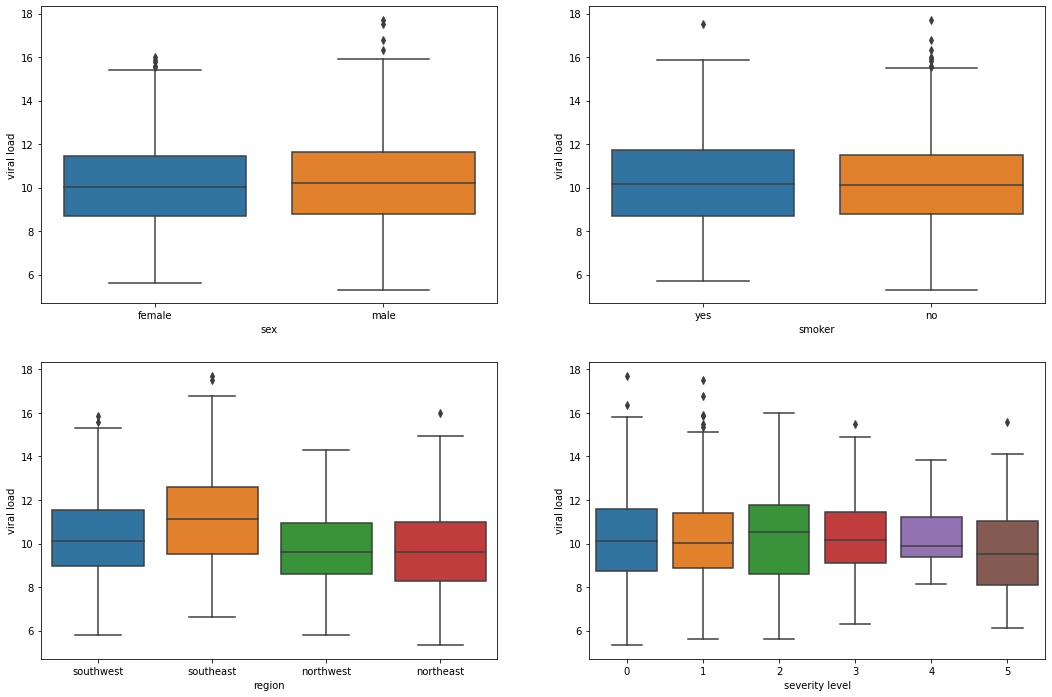

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
index = 0
for i in range(2):
  for j in range(2):
    sns.boxplot(y='viral load', x=cat_cols[index], data=df,ax=axs[i, j])
    index += 1
plt.show()

Observations
1. viral load not related to either sex or smoker
2. Patients from south east have higher viral load as compared to other regions.

####  Multivariate Analysis

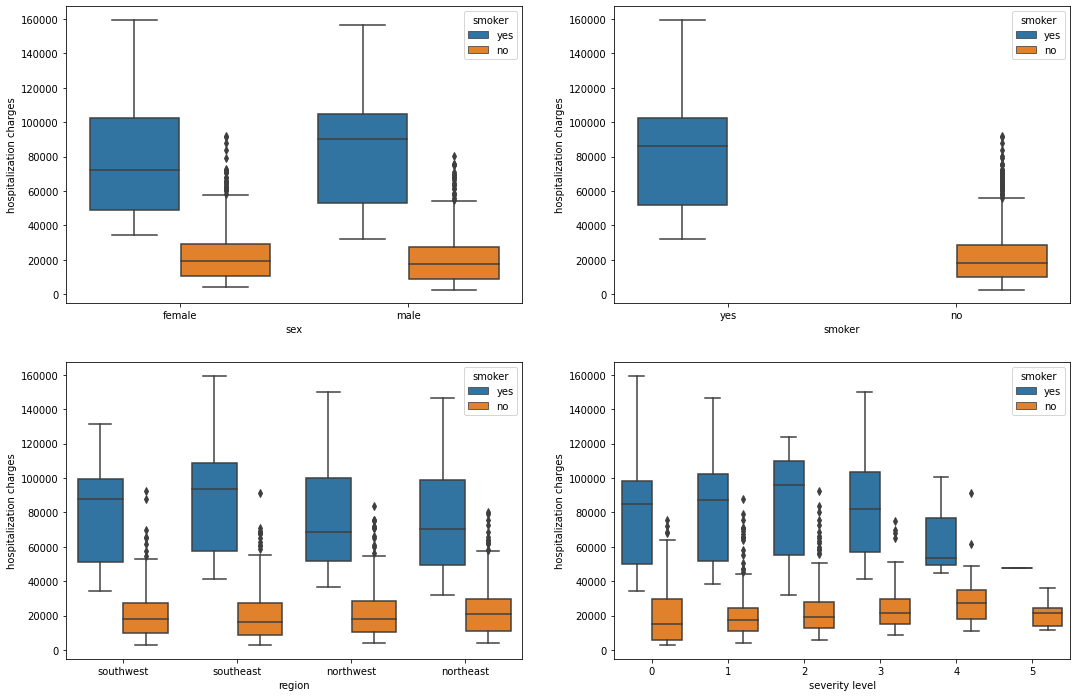

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
index = 0
for i in range(2):
  for j in range(2):
    sns.boxplot(y='hospitalization charges',x=cat_cols[index],hue='smoker',data=df, ax=axs[i, j])
    index += 1
plt.show()

Observations
1. High hospitalization charges for Male smoker patients as compared to Female smoker patients.
2. Hospitalization charges for smoker patient is comparatively larger than non smoker.
3. southeast region have Highest Hospitalization charge for smoker patient in comparision to
other region followed by southwest region
4. Hospitalization charges for smoker patient is comparatively greater than non smoker patient
having same save severity level.
5. severity level 2 has highest hospitalization mark followed by 1 then 0 for smoker category
patient

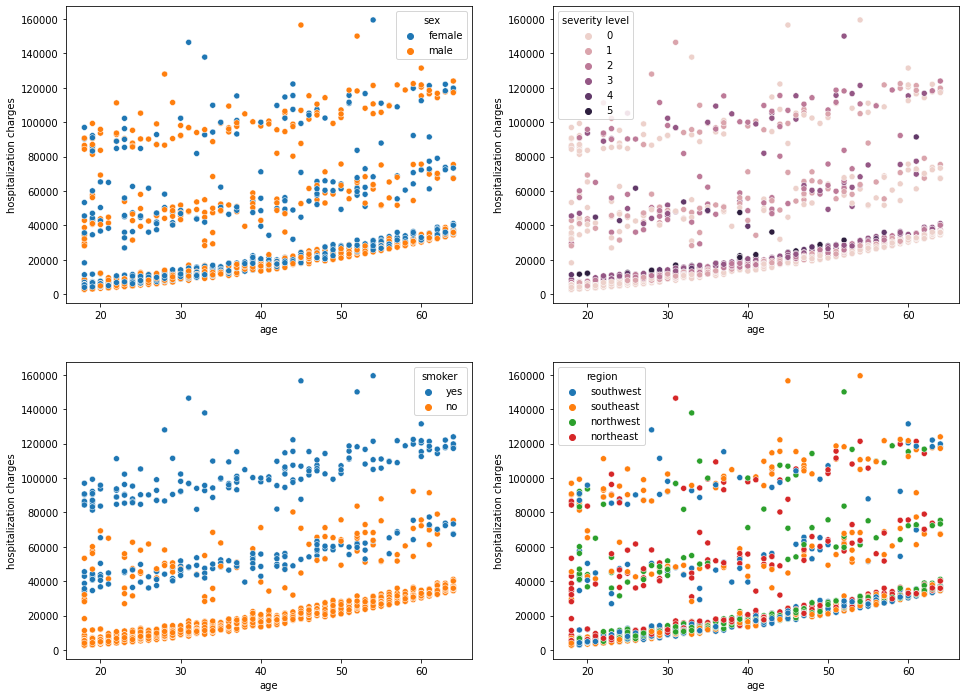

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.scatterplot(y='hospitalization charges', x='age', data=df, hue='sex',ax=axs[0, 0])
sns.scatterplot(y='hospitalization charges', x='age', data=df, hue='severity level', ax=axs[0,1])
sns.scatterplot(y='hospitalization charges', x='age', data=df, hue='smoker',ax=axs[1,0])
sns.scatterplot(y='hospitalization charges', x='age', data=df, hue='region',ax=axs[1,1])
plt.show()

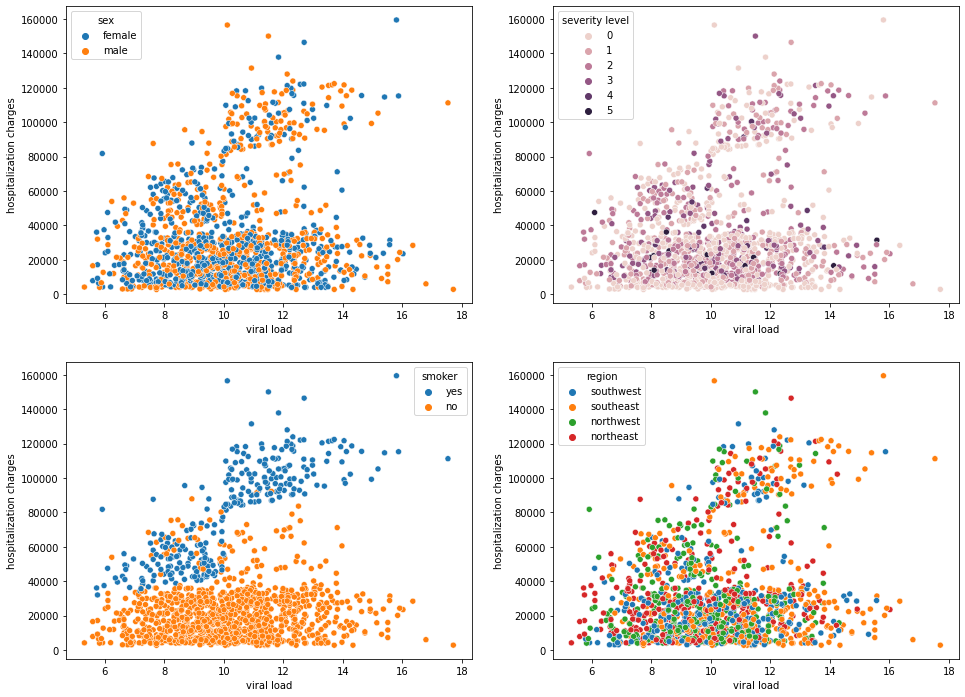

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.scatterplot(y='hospitalization charges', x='viral load', data=df,hue='sex', ax=axs[0, 0])
sns.scatterplot(y='hospitalization charges', x='viral load', data=df,hue='severity level', ax=axs[0,1])
sns.scatterplot(y='hospitalization charges', x='viral load', data=df,hue='smoker', ax=axs[1,0])
sns.scatterplot(y='hospitalization charges', x='viral load', data=df,hue='region', ax=axs[1,1])
plt.show()

from above charts we can see smoker patients will have high hospitalization charges. other attributes
doesn’t have any corelation/pattern with hospitalisation charge


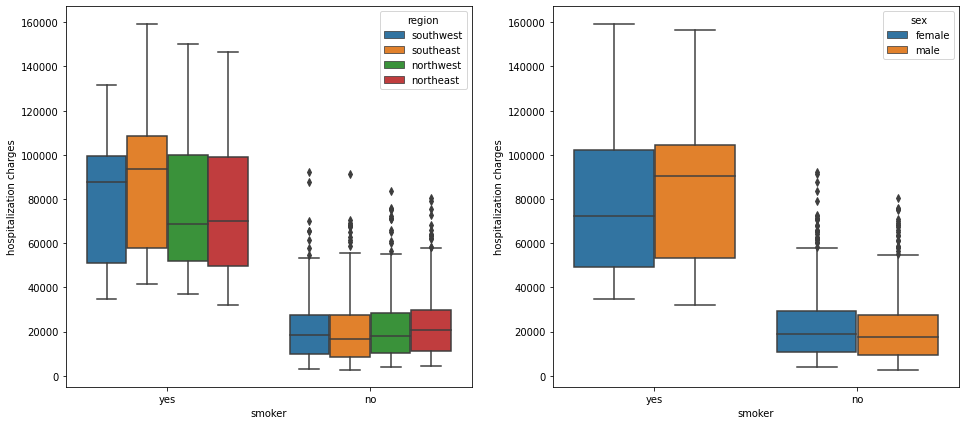

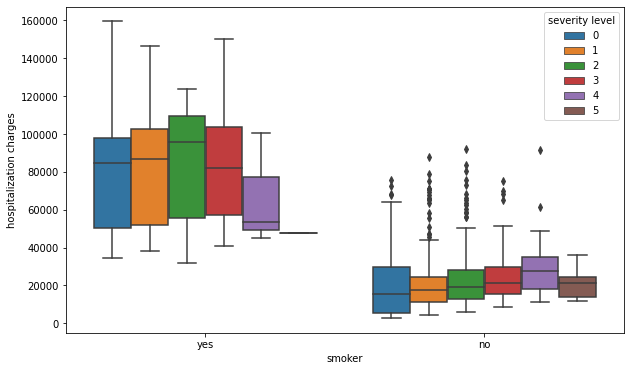

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
sns.boxplot(y='hospitalization charges', x='smoker', hue='region', data=df,ax=axs[0])
sns.boxplot(y='hospitalization charges', x='smoker', hue='sex', data=df,ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y='hospitalization charges', x='smoker', hue='severity level',data=df)
plt.show()

# here we made for smoker cat, we can make similar for other cats.

Observations
1. Male smoker patients have high hospitalization charges as compared to Female smoker patients .
2. female with severity level 3 & 4 will have high hospitalization charges while male with severity
level 0 & 4 will have almost similary hospitalization charges .
3. In smoker patients , patients with severity level - 2 will have higher hospitalization charges
as comapred to other severity levels.
4. In non-smoker patients , patients with severity level - 4 will have higher hospitalization charges
as compared to other severity lavels.
5. In smoker patients , patients living in southwest region will have higher hospitalization charges
as compared to other regions.
6. male patients in southweat & southeast regions will have slightly higher hospitalization
charges as compare females while female patients in northweat & northeast will have slightly
higher hospitalization charges as compared to male patients.
7. smoker patients living in southwest & southeast regions will have high hospitalization charges
as compared to smoker patients living in north regions.
8. Patients living in southwest & northeast and have severity level-4 will have higher hospitalization charges as compared to other severity level patients
9. Patients living in southeast & northwest and have severity level-3 will have higher hospitalization charges as compared to other severity level patients

### Missing values treatment & Outlier treatment

In [ ]:
# dataset has no missing values, checked in first section.
# Outiler has treated in second section with IQR method (for few outliers) and with percentile methods (for many outliers).

### Hypothesis Testing

In [ ]:
def Hypothesis_testing(Samples,alpha,alternative,mu,crosstab):
  
  if alternative=='two-sided':
    H0 = 'means are equal'       
  elif alternative== 'less':
      H0 = 'Sample1>=Sample2'
  elif alternative=='greater':
    H0 = 'Sample1<=Sample2'
  else:
    print('Check the alternative input')
    exit()
  H0_chi_stat = 'obs and exp values are same, proportions are similar'
  H0_chi2_contingency = 'variables are independet, liklihoods are similar'
  if not all(Samples):
    print('Check Samples detail input')
    exit()

  if type(Samples[0][0])==list:

    if sum(Samples[0][0])-sum(Samples[0][1])<0.001:
      print('Chi square test for goodness of fit (obs,exp)')
      from scipy.stats import chisquare  
      test, p_val = chisquare(*Sample1)  
      print("p-value is: " + str(p_val)) 
      print('null hypothesis: ',H0_chi_stat)
      if p_val <= alpha:  
          print('We can reject the null hypothesis')  
      else:  
          print('We can accept the null hypothesis')
        
    else:
      print('Chi square test for indepedence (contingency)')
      from scipy.stats import chi2_contingency  
      test, p_val, dof, expected_val = chi2_contingency(Sample1)  
      print("p-value is: " + str(p_val))
      print('null hypothesis: ',H0_chi2_contingency)
      if p_val <= alpha:  
          print('We can reject the null hypothesis')  
      else:  
          print('We can accept the null hypothesis')
    
  elif len(Samples)>2:
    print(len(Samples), 'Sample','Anova f test')
    from scipy.stats import f_oneway  
    f_test, p_val = f_oneway(*Samples)  
    print("p-value is: " + str(p_val))
    print('null hypothesis: ',H0)
    if p_val < alpha:      
        print("We can reject the null hypothesis")  
    else:  
        print("We can accept the null hypothesis")  
    
  elif len(Samples)>1:
    print(len(Samples), 'Sample','t-test')
    from scipy.stats import ttest_ind 
    t_test,p_val = ttest_ind(*Samples)
    print("p-value of independent t-test is: ", p_val)
    print('null hypothesis: ',H0)
    if p_val < alpha:      
        print("We can reject the null hypothesis")  
    else:  
        print("We can accept the null hypothesis") 

    if len(Samples[0])==len(Samples[1]):
      from scipy.stats import ttest_rel
      t_test, p_val = ttest_rel(*Samples, alternative=alternative)  
      print("p-value of the paried t-test is: ", p_val)
      print('null hypothesis: ',H0) 
      if p_val < 0.05:  
          print("We can reject the null hypothesis")  
      else:  
          print("We can accept the null hypothesis") 
      
    
  elif len(Samples)==1:
    print(len(Samples), 'Sample','t test')
    from scipy.stats import ttest_1samp			
    t_stat, p_val = ttest_1samp(Samples[0],mu, alternative=alternative)	
    print("P-value is: ", p_val)
    print('null hypothesis: ',H0)
    if p_val < 0.05:      
        print(" We can reject the null hypothesis")  
    else:  
        print("We can accept the null hypothesis") 
  
  import matplotlib.pyplot as plt
  import seaborn as sns
  if type(Sample1[0])==list:
    crosstab.plot(kind="bar",figsize=(8,5))
    print(crosstab)
  else:
    for samp in (Samples): 
      sns.kdeplot(samp,fill=True)
    plt.show()

    import numpy as np
    for i in range(len(Samples)):
      if alternative=='less':
        print(f'mean of Sample{i+1}:',np.mean(Samples[i]).round(2), '       95% Range [5%-100%] :', [np.percentile(Samples[i],5).round(2),np.max(Samples[i]).round(2)])
      elif alternative=='greater':
        print(f'mean of Sample{i+1}:',np.mean(Samples[i]).round(2), '       95% Range [0%-95%] :', [np.min(Samples[i]).round(2),np.percentile(Samples[i],95).round(2)])
      else:
        print(f'mean of Sample{i+1}:',np.mean(Samples[i]).round(2), '       95% Range [2.5%-97.7%] :', [np.percentile(Samples[i],2.5).round(2),np.percentile(Samples[i],97.5).round(2)])

In [ ]:
df.groupby('smoker')['hospitalization charges'].describe()

In [ ]:
df.groupby('sex')['viral load'].describe()

In [ ]:
contigency= pd.crosstab(df.region, df.smoker)
contigency
# Same as         df.groupby(['region','smoker'])['age'].count().unstack()

In [ ]:
contigency.plot(kind='bar')

2 Sample t-test
p-value of independent t-test is:  5.209104236115724e-207
null hypothesis:  Sample1<=Sample2
We can reject the null hypothesis


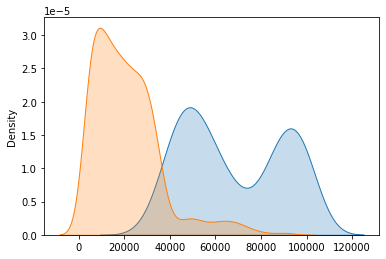

mean of Sample1: 67860.81        95% Range [0%-95%] : [32074, 99665.8]
mean of Sample2: 21105.42        95% Range [0%-95%] : [2805, 52329.45]


In [ ]:
# null hypothesis = hospitalization charge of people who do smoking is lesser than those who don't.
# alternative hypothesis = hospitalization charge of people who do smoking is greater than those who don't.

Sample1=df[df['smoker']=='yes']['hospitalization charges'].tolist()
Sample2=df[df['smoker']=='no']['hospitalization charges'].tolist()
Samples=[Sample1,Sample2]
alpha = 0.05 
alternative = 'greater'   # 'two-sided'  # 'less' , 'greater'
mu = None
crosstab=None
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# conclusion: hospitalization charge of people who do smoking is greater than those who don't.

2 Sample t-test
p-value of independent t-test is:  0.3144637521964963
null hypothesis:  means are equal
We can accept the null hypothesis


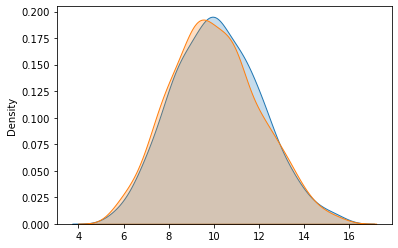

mean of Sample1: 10.13        95% Range [2.5%-97.7%] : [6.64, 14.07]
mean of Sample2: 10.02        95% Range [2.5%-97.7%] : [6.47, 13.98]


In [ ]:
# null hypothesis =  viral load of females is same as males.
# null hypothesis =  viral load of females is different as males.

Sample1=df[df['sex']=='male']['viral load'].tolist()
Sample2=df[df['sex']=='female']['viral load'].tolist()
Samples=[Sample1,Sample2]
alpha = 0.05 
alternative = 'two-sided'  # 'two-sided'  # 'less' , 'greater'
mu = None
crosstab=None
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# conclusion: viral load of females is same as males

Chi square test for indepedence (contingency)
p-value is: 0.558169723528082
null hypothesis:  variables are independet, liklihoods are similar
We can accept the null hypothesis
region  northeast  northwest  southeast  southwest
smoker                                            
no            256        267        268        267
yes            53         46         59         46


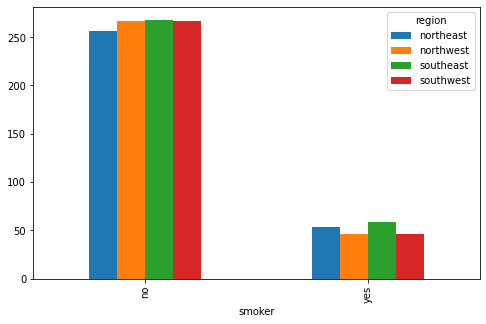

In [ ]:
# null hypothesis =  proportion of smoking significantly similar across different regions.
# alternative hypothesis =  proportion of smoking significantly different across different regions.

import pandas as pd
crosstab = pd.crosstab(index=df['smoker'], columns=df['region'])   # Sample1 = crosstab.values.tolsit()
Sample1=crosstab.values.tolist()
Samples=[Sample1]
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# Conclusion: proportion of smoking significantly similar across different regions.

Chi square test for indepedence (contingency)
p-value is: 0.03245297207395062
null hypothesis:  variables are independet, liklihoods are similar
We can reject the null hypothesis
sex     female  male
smoker              
no         546   512
yes         88   116


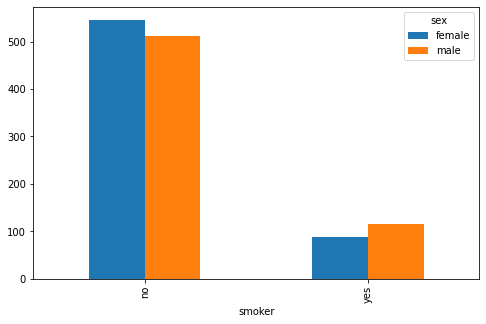

In [ ]:
# null hypothesis =  proportion of smoking significantly similar across different gender.
# alternative hypothesis =  proportion of smoking significantly different across different gender.

import pandas as pd
crosstab = pd.crosstab(index=df['smoker'], columns=df['sex'])   # Sample1 = crosstab.values.tolsit()
Sample1=crosstab.values.tolist()
Samples=[Sample1]
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# conclusion: we can say that there are more males who are smoker.

Chi square test for indepedence (contingency)
p-value is: 0.5963357865679622
null hypothesis:  variables are independet, liklihoods are similar
We can accept the null hypothesis
severity level    0    1    2    3   4   5
smoker                                    
no              457  260  184  118  22  17
yes              90   45   36   29   3   1


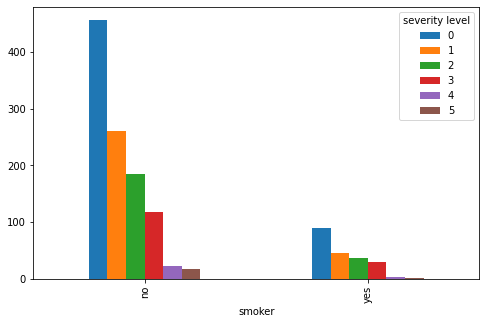

In [ ]:
# null hypothesis =  proportion of smoking significantly similar across different severity level.
# alternative hypothesis =  proportion of smoking significantly different across different severity level.

import pandas as pd
crosstab = pd.crosstab(index=df['smoker'], columns=df['severity level'])   # Sample1 = crosstab.values.tolsit()
Sample1=crosstab.values.tolist()
Samples=[Sample1]
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# conclusion: we can not say that people who smoke has higher severity level.

3 Sample Anova f test
p-value is: 0.90641731132652
null hypothesis:  means are equal
We can accept the null hypothesis


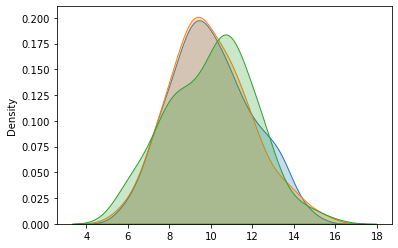

mean of Sample1: 10.02        95% Range [2.5%-97.7%] : [6.73, 13.79]
mean of Sample2: 9.94        95% Range [2.5%-97.7%] : [6.68, 14.06]
mean of Sample3: 10.03        95% Range [2.5%-97.7%] : [5.97, 14.26]


In [ ]:
# null hypothesis =  the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are the same.
# null hypothesis =  the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are different.

cf=df['sex']=='female'
c0=df['severity level']==0
c1=df['severity level']==1
c2=df['severity level']==2

Sample1=df[(cf) & (c0)]['viral load'].tolist()
Sample2=df[(cf) & (c1)]['viral load'].tolist()
Sample3=df[(cf) & (c2)]['viral load'].tolist()
Samples=[Sample1,Sample2,Sample3]
alpha = 0.05 
alternative = 'two-sided'  # 'two-sided'  # 'less' , 'greater'
mu = None
crosstab=None
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# conclusion: the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are the same.

In [ ]:
# hospitalization charges column is not normally distributed
# we can perform nonparametric statistical hypothesis tests

# null hypothesis = hospitalization charge of people who do smoking is lesser than those who don't.
# alternative hypothesis = hospitalization charge of people who do smoking is greater than those who don't.

from scipy.stats import mannwhitneyu
sample1 = df[df['smoker']=='yes']['hospitalization charges'].tolist()
sample2 = df[df['smoker']=='no']['hospitalization charges'].tolist()
stat, p = mannwhitneyu(sample1, sample2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution, accept null hypothesis.')
else:
 print('Probably different distributions, reject null hypothesis.')

stat=208428.500, p=0.000
Probably different distributions, reject null hypothesis.


In [ ]:
# hospitalization charges column is not normally distributed
# we can perform nonparametric statistical sypothesis tests

# null hypothesis = hospitalization charges are similar across different severity level.
# alternative hypothesis = hospitalization charges are different across different severity level.

from scipy.stats import mannwhitneyu
sample1 = df[df['severity level']==0]['hospitalization charges'].tolist()
sample2 = df[df['severity level']==1]['hospitalization charges'].tolist()
sample3 = df[df['severity level']==2]['hospitalization charges'].tolist()
sample4 = df[df['severity level']==3]['hospitalization charges'].tolist()
stat, p = kruskal(sample1, sample2, sample3, sample4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution, accept null hypothesis.')
else:
 print('Probably different distributions, reject null hypothesis.')

# Conclusion: hospitalization charges are different across different severity level.

stat=27.000, p=0.000
Probably different distributions, reject null hypothesis.


4 Sample Anova f test
p-value is: 0.0035397453106568765
null hypothesis:  Sample1<=Sample2
We can reject the null hypothesis


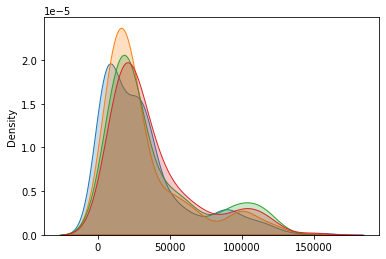

mean of Sample1: 30914.94        95% Range [0%-95%] : [2805, 97698.45]
mean of Sample2: 31827.94        95% Range [0%-95%] : [4278, 102023.6]
mean of Sample3: 37683.91        95% Range [0%-95%] : [5760, 110514.25]
mean of Sample4: 38388.31        95% Range [0%-95%] : [8608, 106125.4]


In [ ]:
# parametric test is not applicable hospitalization charges,
# but we are just comparing the result with previous non parametric test.

sample1 = df[df['severity level']==0]['hospitalization charges'].tolist()
sample2 = df[df['severity level']==1]['hospitalization charges'].tolist()
sample3 = df[df['severity level']==2]['hospitalization charges'].tolist()
sample4 = df[df['severity level']==3]['hospitalization charges'].tolist()
Samples = [sample1, sample2, sample3, sample4]
alpha = 0.05 
alternative = 'greater'  # 'two-sided'  # 'less' , 'greater'
mu = None
crosstab=None
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab)

# Conclusion: hospitalization charges are different across different severity level.

### Business Insights and Recommendations


4.0.2 Business Insights
1. we have almost equal amount of male and female customer , 49.51% female customer and
50.48% male customer respectively.
2. 79% non smoker and 20.49% smoker patient
3. from southeast we have 27.22% patient and almost 24% from all other region i.e southwest,northwest,norteast
4. smoker patients have high hospitalization charges.
5. Mean hospitalization charges are greater for smoker than those who don’t smoke.
6. viral load of females is no differnet from that of males.
7. proportion of smoking is same across different regions.
8. mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the
equal.
9. Patients living in southeast and northeast , have slightly higher hospitalization charges as
compared to southweat and northwest respectively.
10. with increase in severity level from 1 to 5 hospitalization charges also increses.
11. High hospitalization charges for Male smoker patients as compared to Female smoker patients.
12.female with severity level 3 & 4 will have high hospitalization charges while male with
severity level 0 & 4 will have almost similary hospitalization charges .
12. In smoker patients , patients with severity level - 2 will have higher hospitalization charges
as comapred to other severity levels.
13. In non-smoker patients , patients with severity level - 4 will have higher hospitalization charges
as compared to other severity lavels.

4.0.3 Recommendations
1. More Awarness drive can be created among the people describing consequences of smoking/any viral pandemic regarding infection ratio among various categories .
2. since Patients from south east have higher viral load as compared to other regions so number
of hospitals can be increased in that reason for providing easy and smooth treatment facility.
3. smokers are more prone to chronic bronchitis cancerous diseases and we have good amount
of patients belong to smoker categories , hence hospital can make sure to have good quality
of doctor and treatment facilities for diseases cause by smoking along with other diseases.

Based on EDA and statistical evidence it can be seen that customer who smoke or have higher viral load have
more higher hospitalization charges.
We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get
help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates
specific number of points.
High viral load is primarily because of less immunity in the body. We can provide patients with high vitamins
rich diet plans and wellness health coaches which can help them to make right choices.

# Project End  .........................................................................................................................

#### outlier treatment (other work)

from univariate histogram and box plot we concluded that:

1. age Follows somewhat uniform distribution
2. viral load Looks like the normal distribution
3. hospitalization charges is right skewed

4. age doesn’t have any outliers
5. viral load with few outliers
6. hospitalization charges with lot of outliers


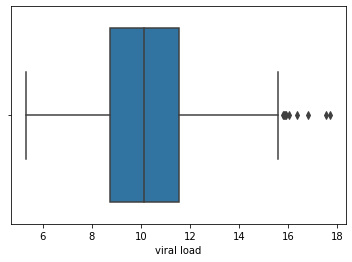

<AxesSubplot:xlabel='viral load'>

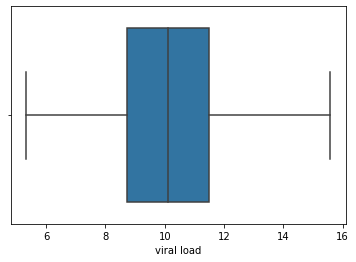

In [ ]:
#since viral load has just 9 outlier which 0.67 so we can remove that
new_data=pd.read_csv('/content/scaler_apollo_hospitals.csv')
sns.boxplot(x='viral load',data=new_data)
plt.show()

q1 = np.percentile(data['viral load'], 25)
q3 = np.percentile(new_data['viral load'], 75)
iqr = q3-q1

new_data= new_data[(new_data['viral load'] > (q1-1.5*iqr)) & (new_data['viral load'] < (q3+1.5*iqr))]
sns.boxplot(x='viral load',data=new_data)

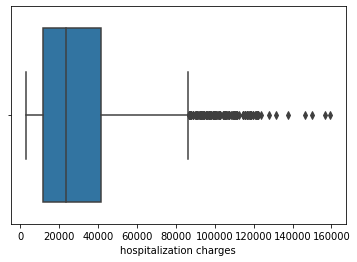

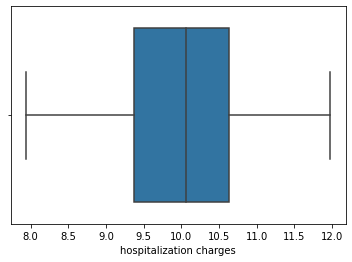

In [ ]:
# In order to remove outlier from hospitalization lets take log and check
new_data=pd.read_csv('/content/scaler_apollo_hospitals.csv')
new_data['hospitalization charges']=np.log(new_data['hospitalization charges'])
sns.boxplot(x='hospitalization charges',data=df)
plt.show()
sns.boxplot(x='hospitalization charges',data=new_data)
plt.show()

<AxesSubplot:xlabel='hospitalization charges', ylabel='Count'>

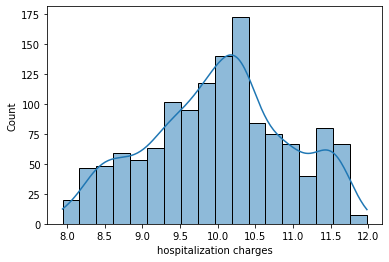

In [ ]:
sns.histplot(x=data['hospitalization charges'], kde=True)

In [ ]:
smoker = data[data['smoker']=='yes']['hospitalization charges']
non_smoker = data[data['smoker']=='no']['hospitalization charges']

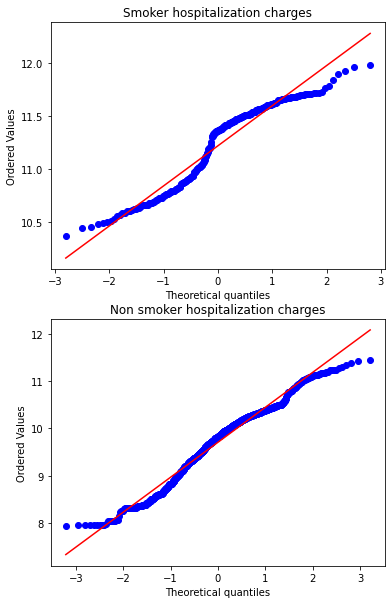

In [ ]:
# normality test
import scipy.stats as stats
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6,10))
stats.probplot(smoker, plot=axs[0])
stats.probplot(non_smoker, plot=axs[1])
axs[0].set_title("Smoker hospitalization charges")
axs[1].set_title("Non smoker hospitalization charges")
plt.show()

## Step 1: Define the null and alternate hypotheses

$H_0:$ The mean count in different weather are equal.

$H_a:$ The mean count in different weather are different.

## Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Count follows normal distribution

against the alternative hypothesis

>$H_a:$ Count doesn't follow normal distribution

### Levene’s test

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest


In [ ]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df['hospitalization charges']) 
print('The p-value is', p_value)
print('normal distribution' if p_value>0.05 else 'Not normal distribution')

The p-value is 1.1505194006561963e-36
Not normal distribution


In [ ]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = stats.levene( smoker, non_smoker)
# find the p-value
print('The p-value is', p_value)
print('Same variance' if p_value>0.05 else 'Not same variance')

# The assumption of homogeneity of variance is an assumption of the independent samples t-test and ANOVA stating that all comparison groups have the same variance.

The p-value is 1.332832802389931e-20
Not same variance


In [ ]:
print(smoker.var(), non_smoker.var())

0.15017327716605677 0.5538951491820641


In [ ]:
len(smoker),len(non_smoker)

(274, 1064)

In [ ]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = stats.levene( smoker, non_smoker.sample(len(smoker)))
# find the p-value
print('The p-value is', p_value)
print('Same variance' if p_value>0.05 else 'Not same variance')

# The assumption of homogeneity of variance is an assumption of the independent samples t-test and ANOVA stating that all comparison groups have the same variance.

The p-value is 4.4507452723460394e-14
Not same variance


In [ ]:
len(smoker), len(non_smoker.sample(len(smoker)))

(274, 274)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

Hypothesis Testing - 1
> $H_0$: Mean hospitalization charges for smoker and non smoker are same

> $H_a$: Mean hospitalization charges are greater for smoker than those
who don’t smoke.

In [ ]:
res = stats.ttest_ind(smoker, non_smoker, alternative='greater')
res

Ttest_indResult(statistic=32.59026445594537, pvalue=3.1525797210992296e-172)

In [ ]:
res = stats.ttest_ind(smoker, non_smoker.sample(len(smoker)), alternative='greater')
res

Ttest_indResult(statistic=29.244115700342743, pvalue=3.9475935256062456e-114)

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

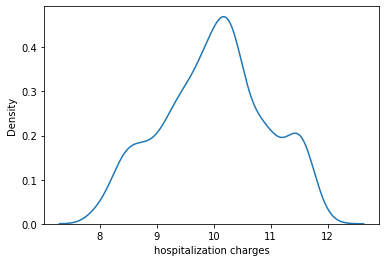

In [ ]:
sns.kdeplot(x=data['hospitalization charges'])

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

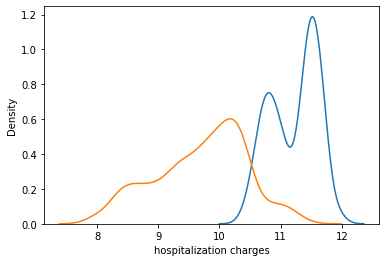

In [ ]:
sns.kdeplot(x=smoker)
sns.kdeplot(x=non_smoker)

<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

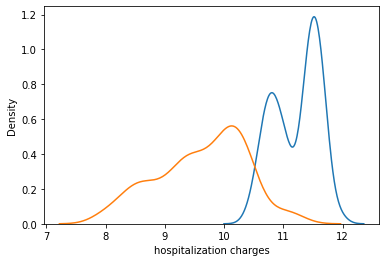

In [ ]:
sns.kdeplot(x=smoker)
sns.kdeplot(x=non_smoker.sample(len(smoker)))

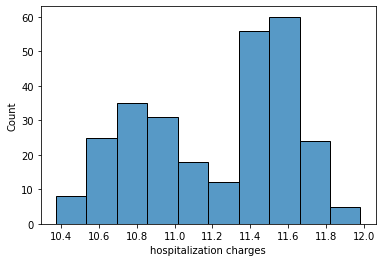

<AxesSubplot:xlabel='hospitalization charges', ylabel='Count'>

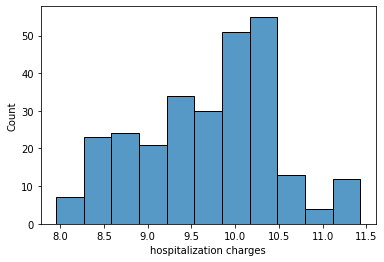

In [ ]:
sns.histplot(x=smoker)
plt.show()
sns.histplot(x=non_smoker.sample(len(smoker)))

### References:

https://www.geeksforgeeks.org/ml-kolmogorov-smirnov-test/


for checking age uniformity


https://www.statology.org/kolmogorov-smirnov-test-python/#:~:text=The%20Kolmogorov%2DSmirnov%20test%20is,one%2Dsample%20test%20or%20scipy.

for checking smoker nonsmoker come form same distribution or not

In [ ]:
# Insights:
# There are less patients who are smoker.
# 80% patients does not smoke.
# There are more number of males who are smoker than females.
# there are just less than 5% patients with higher severity level 4 or 5.
# there 43% patients with very low severity level 0.
# most patients belong to southeast region.
# maximum hospitalization charge has paid by patient is 159426.
# minimum hospitalization charge has paid by patient is 2805.
# age column is showing continuous uniform distribution.
# viral load column is showing continuous normal distribution.
# hospitalization charge column is showing lognormal distribution.
# dataset conatins no missing values.
# age column has no outliers present in dataset.
# viral load column has less than 1% outliers, we removed.
# hospitalization charge column has more than 10% outliers, removed 1%.
# In general there is no correlation between any two variables,
# But if we see correlation for onle smoker patients then,
# we can observe that there is highly correlation between viral load and hospitalization charge
# and also there is correlation between age and hospitalization charge
# using parametic test we conclueded that:
# hospitalization charge of people who do smoking is greater than those who don't.
# proportion of smoking significantly similar across different regions.
# viral load of females is same as males.
# we can say that there are more males who are smoker.
# we can not say that people who smoke has higher severity level.
# the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are the same.
# hospitalization charges are different across different severity level.
# Recommendations
# More Awarness drive can be created among the people describing consequences of smoking/any viral pandemic regarding infection ratio among various categories .
# since Patients from south east have higher viral load as compared to other regions so number of hospitals can be increased in that reason for providing easy and smooth treatment facility.
# smokers are more prone to chronic bronchitis cancerous diseases and we have good amount of patients belong to smoker categories, 
# hence hospital can make sure to have good quality of doctor and treatment facilities for diseases cause by smoking along with other diseases